<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/regression/02_RegressioneLineare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cosa andremo a fare oggi?

  * Introduzione alla libreria scikit-learn
  * Regressione vs Classificazione 
  * Regressione Lineare
    * Regressione Lineare: Esempio 1: Stima del salario mensile di un individuo basandoci solo sull'etá della persona.
    * Regressione Lineare: Esempio 2: Stima del salario mensile di un individuo prima basandoci sull'etá, sul numero di ore di lavoro mensili e sull'indice (1-10) di esperienza della persona.
    * Regressione Lineare Esempio 3: Utilizzeremo la regressione lineare per approssimare delle curve nello spazio 2D.
  * Scikit-Learn datasets Spiegazione, nozioni su come scaricarli applicazione della regressione lineare a un dataset di scikit-learn (diabetes dataset)


# Introduzione alla libreria scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) è una libreria di machine learning.
* [Sklearn Installation page](https://scikit-learn.org/stable/install.html)  

```
# Pip packet manager
pip install -U scikit-learn
# Conda packet manager 
conda install scikit-learn
```

# Regressione vs Classificazione
Appartengono entrambi alla cateria di "Supervised Learning" (Apprendimento Supervisionato). Con ciò intendiamo quella situazione in cui io mi creo un dataset (quindi racconto una serie di dati) e con questi dati cerco di risolvere un problema. Posso risolvere due tipi di problema:

## Regressione: Spiegazione      
<center><h2>Qualè il valore di?</h2></center>
Quando parliamo di regressione vogliamo stimare, predirre un NUMERO usando dei dati precedenemente raccolti. Quello che vogliamo predirre dipende dagli input che abbiamo.

### Esempi Regressione:
  * Dato il salario mensile delle persone che lavorano in Google e la loro età vogliamo capire (stimare, predirre) quanto guadagnerà marco che ha 20 anni se venisse assunto domani.
  * Dati gli ultimi match dell'inter e la qualità degli ultimi acquisti vogliamo stimare il numero di punti che esso otterrà a fine campionato.
  * Vogliamo approssimare una curva nello spazio. Cioè data una curva nella spazio 2D vogliamo trovare una funzione matematica capace di approssimarla.
  * Vogliamo stimare il numero di anni che un pc appena comprato durerà, analizzando quando normamente dura.
  * Vogliamo stimare la qualità di questo corso (da 1 a 10) sulla base delle vostre valutazioni e del numero di ore del corso.
  * Vogliamo predirre il numero di studenti che passerà l'esame analizzando il vostro background (1-10), il numero di domande fatte e il numero di esercitazioni che avete risolto correttamente.

## Classificazione: Spiegazione
<center><h2>Chi tra?</h2></center>
Parliamo invece di classificazione quando volgiamo DISTINGUERE (cioè capire se un qualcosa è a o b). Non ci interessa in questa caso avere una percentuale o un indicazione numerica vogliamo differenziare qualcosa. 

### Esempi Classificazione:

  * Quale squadra di calcio vincerà il campionato? Nel campionato italiano ci sono 20 squadre, tra queste 20 voglio indovinare quale vincerà.
  * Dati un insieme di data relativi a un paziente vogliamo capire se ha un raffreddore o semplicemente la febbre. (O uno o l'altro)
  * Sulla base delle specifiche vogliamo campire se è più adatto come gaming laptop il mac pro, il dex xps o l'msi. Chi tra questi tre pc è più adatto?
  * Sulla base del numero di persone assunte, più altre informazione vogliamo capire se è meglio per uno studente incerto inscriversi a giurisprudenza, oppure a ingegneria.
  * Basandoci sulle citazioni più famose dei filosi vogliamo capire chi ha è più conosciuto tra Risultati relativi a Immanuel Kant
  * Raccogliendo dati di 100 persone che hanno seguito le seguenti diete  (Dieta dissociata, Dieta Mediterranea, Cronodieta, Dieta del biscotto) vogliamo capire quale tra queste è più adatta a me.

# Regressione Lineare

Significato:

* dato una serie di dati misurati vogliamo trovare una relazione matematica tra i dati misurati e l'output desirato. <br>
Vogliamo predirre qualcosa.


## Regressione Lineare: Esempio 1: Stima del salario mensile di un individuo basandoci solo sull'etá della persona.


### Spiegazione del Problema
Vogliamo predirre il salario di un lavoratore mensile in euro basandoci sulla sua età.

Definiamo il problema matematicamente (caso lineare):

<h2><center>$Y = w_0*1 + w_1*X1$</center></h2>

  * Y: salario che voglio predire
  * X1: età del lavoratore esempio X1=25 anni 
  * $w_0$ e w1 sono i due parametri da stimare (Sconosciuti)

Il problema di regressione consiste nel determinare le variabili sconosciute ($w_0$, $w_1$) utilizzando un dataset (insieme dei dati raccolti). Una volta indiviudati i parametri $w_0$ e $w_1$ saremo in grado di stimare quanto guandagna una persona a noi sconosciuta semplicemente basandoci sulla sue età.

* Step 1) Dato un insieme di dati raccolti ( Y e X1) vogliamo stimare i parametri sconosciuti $w_0$ e $w_1$ (sono due numeri)

```
Dati Raccolti:
Y = Salario al mese in euro
X1 = Età del lavoratore
1) Marco:    Y=1100   X1=19
2) Daniele:  Y=1150   X1=21
3) Davide:   Y=1155   X1=22
4) Marta:    Y=1170   X1=23
6) Alessia:  Y=1200   X1=26
9) Stella:   Y=1750   X1=33
10) Chiara   Y=1640   X1=29  
```
* Step 2) Vogliamo rispondere alla seguente domanda: 
  <h2><center>Quanto guadagnerá Giada se ha 25 anni?</center>

  Vediamo chiaramente che all'aumentare dell'età aumenta il guadagno e ad occhio possiamo dire che Giada guadagnerà intorno ai 1180 euro. Matematicamente ci stiamo chiedendo il valore di Y (salario di giada) conoscendo la sua età (X1=25 anni) e i due parametri $w_0$ e $w_1$ (ottenuti nello step 1)

Andremo a risolvere il sopra citato problema usando la libreria [scikit-learn](https://scikit-learn.org/stable/). In particolare ci focalizzero sulla Regressione lineare.




### Scikit-Learn Regressione Lineare
Dobbiamo capire come scrivere il seguente problema usando la libreria scikit-learn.

*  [Linear Model Regression Descrizione]( https://scikit-learn.org/stable/modules/linear_model.html)
* [Scikit-Learn Linear Regression Documentazione](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

<h2><center>$Y = w_0*1 + w_1*X_1 + w_2*X_2 + ... w_N*X_N$</center></h2>
Dove $X_0, X_1 ... X_N$ rappresentano gli input, nel nostro caso abbiamo solo l`etá ma avremmo potuto avere anche altri valore come il numero di ore di lavoro etc ..
Quindi nel nostro caso avremo $X_1,X_2 ...X_N =0$ e $X_1$ (sarebbe l`etá).
Quindi la sopra descritta equazione diventa
<h2><center>$Y = w_0*1 + w_1*X_1$</center></h2>


### Creiamo il dataset usando numpy
Cominciamo importando entrable le librerie scikit-learn e numpy. Sucessivamente andiamo a scrivere il dataset creato usando numpy.

In [1]:
# Installare libreria se non installata
!pip install scikit-learn

In [2]:
#--------------- Importiamo le librerie ---------------------
from sklearn import linear_model  # dalla libreria sklearn importa la classe / funzione chi si chiama linear-model
import numpy as np
# -----------------------------------------------------------

#------------- Creiamo il dataset usando numpy --------------
'''
Y = Salario al mese in euro
X1 = Età del lavoratore
Equazione = Y = b + a*X --> Y = w0 + w1*X1
1) Marco:    Y=1100   X1=19  Y=w0*1+w1*X1 --> 1100 = w0*1 + w1*19
2) Daniele:  Y=1150   X1=21  Y=w0*1+w1*X1 --> 1150 = w0*1 + w1*21
3) Davide:   Y=1155   X1=22  Y=w0*1+w1*X1 --> 1155 = w0*1 + w1*22 
4) Marta:    Y=1170   X1=23  Y=w0*1+w1*X1 --> 1170 = w0*1 + w1*23
6) Alessia:  Y=1200   X1=26  Y=w0*1+w1*X1 --> 1200 = w0*1 + w1*26
9) Stella:   Y=1750   X1=33  Y=w0*1+w1*X1 --> 1750 = w0*1 + w1*33
10) Chiara   Y=1640   X1=29  Y=w0*1+w1*X1 --> 1640 = w0*1 + w1*29
'''
X= np.array([[1,19],[1,21], [1,22], [1,23], [1,26], [1,33],[1,29]])
Y= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
#Y= np.array([1100,1150,1155,1170,1200,1750,1640])
print("X input data: \n",X, X.shape) 
print("Y output data: \n",Y, Y.shape)
#------------------------------------------------------------



X input data: 
 [[ 1 19]
 [ 1 21]
 [ 1 22]
 [ 1 23]
 [ 1 26]
 [ 1 33]
 [ 1 29]] (7, 2)
Y output data: 
 [[1100]
 [1150]
 [1155]
 [1170]
 [1200]
 [1750]
 [1640]] (7, 1)


#### Implementazione Numpy Linear Regression Closed form solution

In [4]:
# Soluzione Closed form solution Numpy
W = np.matmul( np.matmul( np.linalg.inv( np.matmul( X.T, X ) ), X.T ), Y)  # somme e dei prodotti
#W = (XT*X)^-1XTY

Y_hat = np.matmul(X,W)

# Mean Absolute Error Metrica
Err = np.sum( np.abs( Y_hat - Y ) ) / Y.shape[0]
ErrMAE = np.mean( np.abs( Y_hat - Y ) ) 

# Mean Square Error
ErrMSE = np.mean( ( Y_hat - Y )**2 ) 

# Root mean square error
ErrRMSE = np.sqrt( np.mean( ( Y_hat - Y )**2 ) )

print(ErrMAE,ErrMSE,ErrRMSE)
print(f"W: %s"%(W))

69.57339320797112 7723.424782486669 87.88301760002707
W: [[56.21316306]
 [50.70235756]]


### Implementazione Regressione Lineare scikit-learn

In [5]:
# fit_intercept = False significa che dovremmo manualmente inseririe 1 se vogliamo estrarre il parametro b
reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
reg.fit(X, Y)

print('w0 and w1 ', reg.coef_)
w0 = reg.coef_[0][0]
w1 = reg.coef_[0][1]

# Quanto guadagnerá Giada se ha 25 anni?
X_test = np.array([[1,25]]) # creiamo l'input vector
Y_pred = reg.predict(X_test) # prediciamo il guandagno
Y_pred_ = w0*X_test[0][0] + w1*X_test[0][1] # Y_pred_ = w0*1 + w1*25
print('Giada gudagnerà al mese: ', Y_pred, Y_pred_)


w0 and w1  [[56.21316306 50.70235756]]
Giada gudagnerà al mese:  [[1323.77210216]] 1323.7721021610998


### Implementazione Regressione Lineare scikit-learn Classi

In [ ]:
from sklearn import linear_model
import numpy as np
# Implementazione usando fit_intercept=False , piú vicina alla logica matematica
class Dataset:
    def create(self):
      X= np.array([[1,19],[1,21], [1,22], [1,23], [1,26], [1,33],[1,29]])
      Y= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
      return X,Y

class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      print(self.reg.intercept_) # Questo deve essere 0 se fit_intercept=false
      return self.reg.coef_
    def predict(self,X_test,coef_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T)
      return Y_pred

myDataset=Dataset()
X,Y = myDataset.create()
myLinearRegressor = LinearRegressor()
coef_ = myLinearRegressor.train(X,Y)
print(coef_)
# Set input Giada 25 anni Y=w0*1 + w1*X1 --> 1 X1=25 
X_test = np.array([[1,25]])  
Y_pred = myLinearRegressor.predict(X_test,coef_)
print(Y_pred)



0.0
[[56.21316306 50.70235756]]
[[1323.77210216]]


Nella sezione EXTRA sono presenti:
* Implementazione usando fit_intercept=True. Questa implementazione permette di semplicare la scrittura degli input in quanto permette di omettere l'1
* Implementazione usando la libreria numpy del Regressore lineare (Least Square-Metodo dei Minimi quadrati). Implementazione piú matematica.

<h3>Come doveremmo modificare la creazione dei dati se oltre all'etá della persona avessimo piú informazioni? </h3>
Per esempio se conoscessimo anche:

* il numero di ore mensili di lavoro
* indice di esperienza da 1 a 10


## Regressione Lineare: Esempio 2: Stima del salario mensile di un individuo prima basandoci sull'etá, sul numero di ore di lavoro mensili e sull'indice (1-10) di esperienza della persona.

### Spiegazione del Problema

Il dataset diventerebbe:

```
Y = Salario al mese in euro
X1 = Età del lavoratore
X2 = Numero di ore mensili di lavoro
X3 = Indice di esperienza da 1 a 10
1) Marco:    Y=1100   X1=19   X2=150  X3=6 
2) Daniele:  Y=1150   X1=21   X2=135  X3=8
3) Davide:   Y=1155   X1=22   X2=160  X3=5
4) Marta:    Y=1170   X1=23   X2=158  X3=7
6) Alessia:  Y=1200   X1=26   X2=155  X3=7
9) Stella:   Y=1750   X1=33   X2=120  X3=10
10) Chiara   Y=1640   X1=29   X2=130  X3=9
```
L' equazione della regressione lineare diventa:
<h2><center>$Y = w_0*1 + w_1*X1 + w_2*X2 + w_3*X3$</center></h2>
L'obbiettivo é stimare i parametri $w_0,w_1,w_2,w_3$ partendo da un dataset $(X_1,X_2,X_3,Y)$ come il sopra elencato.

  <h2><center>Quanto guadagnerá Giada se ha 25 anni, lavora 130 ore al mese ed ha un indice di esperienza uguale a 8?</center>



  

### Implementazione

In [ ]:
# 1. Avere i dati in formato numpy array
# 2. Sceliere il modello --> modello = linear_model.LinearRegression()
# 3. Cacolare i coefficienti --> Allenare il  modello --> modello.fit() --> modello.coef_ , modello.intercept_
# 4. Predirre usando nuovi dati

In [11]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

#Y = np.array( [[1100,1150,1155,1170,1200,1750,1640]] ).T # 7x1
#Y = Y.reshape(7,1)
Y = np.array( [[1100],[1150],[1155],[1170],[1200],[1750],[1640]] ) # 7x1
X = np.array( [[19,150,6],[21,135,8],[22,160,5],[23,158,7],[26,155,7],[33,120,10],[29,130,9]] ) # 7x1

# Scelta del modello
# reg = linear_model.LinearRegression(fit_intercept=True)
# reg = linear_model.Ridge() 
# reg = RandomForestRegressor()
# reg = svm.SVR()

# Stima i parametri migliori
reg.fit(X,Y)

# Prendere i parametri
#print(reg.coef_, reg.intercept_)
#w0 = reg.intercept_
#w1 = reg.coef_[0][0]
#w2 = reg.coef_[0][1]
#w3 = reg.coef_[0][2]
#print(w0,w1,w2,w3)
#Y_hat = w0*1 +w1*42+w2*110+w3*4
#print("Y_hat numpy: " + str(Y_hat))

# Compresione: Metrica Quale è il modello migliore? (Training/Test)
Y_hat = reg.predict(X)

rmse = np.sqrt( np.mean(( Y-Y_hat)**2) )
rmse = np.sqrt( mean_squared_error(Y,Y_hat) )
print("RMSE: " + str( rmse) )

# Voglio usare il modello allenato per predirre
input = np.array( [[42,110,4 ]] )
Y_hat = reg.predict( input )
print("Y_hat sklearn: " + str(Y_hat))

RMSE: 55.45796490333383
Y_hat sklearn: [[2396.03692452]]


### Classi esempio

In [ ]:
from sklearn import linear_model
import numpy as np

class model:
  
  def __init__(self):
    # Qunado creo una classe automaticamente questa funzione viene eseguita
    print("Modello Creato")
    self.reg = linear_model.LinearRegression(fit_intercept=True)
  
  def fit(self,X,Y):
    print("Fit")
    self.reg.fit(X,Y)

  def predict(self,X):
    print("Predict")
    Y_hat = self.reg.predict(X)
    return Y_hat

Y = np.array( [[1100],[1150],[1155],[1170],[1200],[1750],[1640]] ) # 7x1
X = np.array( [[19,150,6],[21,135,8],[22,160,5],[23,158,7],[26,155,7],[33,120,10],[29,130,9]] ) # 7x1

m = model()
m.fit(X,Y)
m.predict(X)

### Creiamo il dataset usando numpy

In [ ]:
#--------------- Importiamo le librerie ---------------------
from sklearn import linear_model
import numpy as np
# -----------------------------------------------------------

#------------- Creiamo il dataset usando numpy --------------
'''
Y = Salario al mese in euro
X1 = Età del lavoratore
X2 = Numero di ore mensili di lavoro
X3 = Indice di esperienza da 1 a 10
Equazione = Y = w0 + w1*X1 + w2*X2 + w3*X3
1) Marco:    Y=1100   X1=19   X2=150   X3=6    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*19 + w2*150 + w3*6
2) Daniele:  Y=1150   X1=21   X2=135   X3=8    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*21 + w2*135 + w3*8
3) Davide:   Y=1155   X1=22   X2=160   X3=5    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*22 + w2*160 + w3*5 
4) Marta:    Y=1170   X1=23   X2=158   X3=7    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*23 + w2*158 + w3*7
6) Alessia:  Y=1200   X1=26   X2=155   X3=7    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*26 + w2*155 + w3*7
9) Stella:   Y=1750   X1=33   X2=120   X3=10   Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*33 + w2*120 + w3*10
10) Chiara   Y=1640   X1=29   X2=130   x3=9    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*29 + w2*130 + w3*9
'''

X= np.array([[1,19,150,6],[1,21,135,8], [1,22,160,5], [1,23,158,7], [1,26,155,7], [1,33,120,10],[1,29,130,9]])
Y= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
#Y= np.array([1100,1150,1155,1170,1200,1750,1640])
print("X input data: \n",X, X.shape) 
print("Y output data: \n",Y, Y.shape)
#------------------------------------------------------------

X input data: 
 [[  1  19 150   6]
 [  1  21 135   8]
 [  1  22 160   5]
 [  1  23 158   7]
 [  1  26 155   7]
 [  1  33 120  10]
 [  1  29 130   9]] (7, 4)
Y output data: 
 [[1100]
 [1150]
 [1155]
 [1170]
 [1200]
 [1750]
 [1640]] (7, 1)


### Implementazione Regressione Lineare scikit-learn

In [ ]:
# fit_intercept = False significa che dovremmo manualmente inseririe 1 se vogliamo estrarre il parametro b
reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
reg.fit(X, Y)

print('w0, w1, w2, w3 ', reg.coef_)
w0 = reg.coef_[0][0]
w1 = reg.coef_[0][1]
w2 = reg.coef_[0][2]
w3 = reg.coef_[0][3]

# Quanto guadagnerá Giada se ha X1=25 anni, lavora X2=130 ore al mese e ha un
# indice di esperienza X3=8 ?
X_test = np.array([[1,25,130,8]]) # creiamo l'input vector
Y_pred = reg.predict(X_test) # prediciamo il guandagno
Y_pred_ = w0*X_test[0][0] + w1*X_test[0][1] + w2*X_test[0][2] + w3*X_test[0][3] # Y_pred_ = w0*1 + w1*25 + w2*130 + w3*8
print('Giada gudagnerà al mese: ', Y_pred, Y_pred_)

w0, w1, w2, w3  [[1989.84032486   43.44020785   -9.68682336  -48.36000551]]
Giada gudagnerà al mese:  [[1429.67844041]] 1429.6784404143273


### Implementazione Regressione Lineare scikit-learn Classi

In [ ]:
from sklearn import linear_model
import numpy as np
# Implementazione usando fit_intercept=False , piú vicina alla logica matematica
class Dataset:
    def create(self):
      X= np.array([[1,19,150,6],[1,21,135,8], [1,22,160,5], [1,23,158,7], [1,26,155,7], [1,33,120,10],[1,29,130,9]])
      Y= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
      return X,Y

class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      print(self.reg.intercept_) # Questo deve essere 0 se fit_intercept=false
      return self.reg.coef_
    def predict(self,X_test,coef_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T)
      return Y_pred

myDataset=Dataset()
X,Y = myDataset.create()
myLinearRegressor = LinearRegressor()
coef_ = myLinearRegressor.train(X,Y)
print(coef_)
# Set input Giada 25 anni Y=w0*1 + w1*X1 --> 1 X1=25 
X_test = np.array([[1,25,130,8]])  
Y_pred = myLinearRegressor.predict(X_test,coef_)
print(Y_pred)

0.0
[[1989.84032486   43.44020785   -9.68682336  -48.36000551]]
[[1429.67844041]]


## Regressione Lineare Esempio 3: Utilizzeremo la regressione lineare per approssimare delle curve nello spazio 2D.

### Visualizzare una curva nello spazio 2D

In [57]:
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import numpy as np

# Creiamo gli input
X = np.linspace(0,10,100)
Y = np.sin(2*X)*np.exp(-0.5*X) + 0.2*np.cos(X)

# Visualizzare
#plt.plot(X,Y)
#fig = go.Figure()
#fig.add_trace( go.Scatter( x=X, y=Y ))
#fig.update_layout(title_text="Graph")
#fig.show()

# Estendiamo gli inputs per stimare funzioni piu' complesse
XF = np.array([X,X**2,X**3,X**4,X**5,X**6,X**7,X**8]).T
XI = X.reshape(-1,1)
print("Input iniziale", XI.shape)
print("Input esteso", XF.shape)

Input iniziale (100, 1)
Input esteso (100, 8)


In [67]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

class model:
  
  def __init__(self):
    # Qunado creo una classe automaticamente questa funzione viene eseguita
    print("Modello Creato")
    self.reg = linear_model.LinearRegression(fit_intercept=True)
    #self.reg = RandomForestRegressor()
  
  def fit(self,X,Y):
    print("Fit")
    self.reg.fit(X,Y)

  def predict(self,X):
    print("Predict")
    Y_hat = self.reg.predict(X)
    return Y_hat

m = model()
m.fit(XI,Y)
Y_hat = m.predict(XI)

Modello Creato
Fit
Predict


In [68]:
fig = go.Figure()
fig.add_trace( go.Scatter( x=X, y=Y , name="Y"))
fig.add_trace( go.Scatter( x=X, y=Y_hat, name="Y_hat" ))
fig.update_layout(title_text="Graph")
fig.show()

### Regressore lineare utilizzato per stimare una curva nello spazio

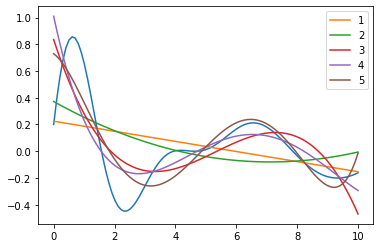

In [ ]:
from sklearn import linear_model
import numpy as np

class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      return self.reg.coef_
    def predict(self,X_test,coef_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T)
      return Y_pred

# Creazione dataset
X1 = np.linspace(0,10,100)
X2 = np.power(X1,2)
X3 = np.power(X1,3)
X4 = np.power(X1,4)
X5 = np.power(X1,5)

X_test1 = np.vstack([np.ones(len(X1)), X1]).T
X_test2 = np.vstack([np.ones(len(X1)), X1, X2]).T
X_test3 = np.vstack([np.ones(len(X1)), X1, X2, X3]).T
X_test4 = np.vstack([np.ones(len(X1)), X1, X2, X3, X4]).T
X_test5 = np.vstack([np.ones(len(X1)), X1, X2, X3, X4, X5]).T

Y = np.sin(2*X1)*np.exp(-0.5*X1) + 0.2*np.cos(X1)

myLinearRegressor1 = LinearRegressor()
myLinearRegressor2 = LinearRegressor()
myLinearRegressor3 = LinearRegressor()
myLinearRegressor4 = LinearRegressor()
myLinearRegressor5 = LinearRegressor()

coef_1 = myLinearRegressor1.train(X_test1,Y)
coef_2 = myLinearRegressor2.train(X_test2,Y)
coef_3 = myLinearRegressor3.train(X_test3,Y)
coef_4 = myLinearRegressor4.train(X_test4,Y)
coef_5 = myLinearRegressor5.train(X_test5,Y)

Y_pred1 = myLinearRegressor1.predict(X_test1,coef_1)
Y_pred2 = myLinearRegressor2.predict(X_test2,coef_2)
Y_pred3 = myLinearRegressor3.predict(X_test3,coef_3)
Y_pred4 = myLinearRegressor4.predict(X_test4,coef_4)
Y_pred5 = myLinearRegressor5.predict(X_test5,coef_5)

#print(Y_pred)
plt.plot(X1,Y)
plt.plot(X1,Y_pred1, label='1')
plt.plot(X1,Y_pred2, label='2')
plt.plot(X1,Y_pred3, label='3')
plt.plot(X1,Y_pred4, label='4')
plt.plot(X1,Y_pred5, label='5')
plt.legend()



# Scikit-Learn datasets Spiegazione, nozioni su come scaricarli applicazione della regressione lineare a un dataset di scikit-learn (diabetes dataset)

Andremo a vedere quali dataset sono disponibili in scikit-learn, come scaricarli e capirne il contenuto.

* [Sklearn dataset page](https://scikit-learn.org/stable/datasets/index.html#datasets)

I dataset disponibili sono i seguenti: 
  * [Iris plant dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
  * [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
  * [Boston houses price dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)
  * [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
  * [Wine Recognition dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)
  * [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
  * [Linnerrud Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)


## Importare i dataset da scikit-learn

In [ ]:
# Importare i datasets
from sklearn import datasets

iris = datasets.load_iris() # Load iris dataset
digits = datasets.load_digits() # Load digits dataset
boston = datasets.load_boston() # Load boston dataset
diabetes = datasets.load_diabetes() # Load diabetes dataset
linnerud = datasets.load_linnerud() # Load linnerud dataset
wine = datasets.load_wine() # Load wine dataset
breast_cancer = datasets.load_breast_cancer() # Load breast_cancer dataset

dataset_scelto = diabetes

# Check the dataset diabetes
#print(dataset_scelto)
parametri = dataset_scelto.keys()
valore = dataset_scelto.values()
print(parametri)

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [ ]:
# Print useful information
for name in parametri:
  print("------------------------------------------")
  print(name , dataset_scelto[name])
  print("------------------------------------------")

------------------------------------------
data [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
------------------------------------------
------------------------------------------
target [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 2

In [ ]:
# Get Data
data = dataset_scelto['data'] # or  data = iris.get('data')
print(type(data), data.shape)
# Get Target
target = dataset_scelto['target']
print(type(target), target.shape)

# Print data
#print(data)
#print(target)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


## Visualizzare il contenuto del dataset usando pandas

In [ ]:
import pandas as pd
# visualize machine laerning data https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
# might be cool: https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7

# Create csv file
df = pd.DataFrame(data=dataset_scelto['data'], columns = dataset_scelto['feature_names'])
df.to_csv('dataset_scelto.csv', sep = ',', index = False)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


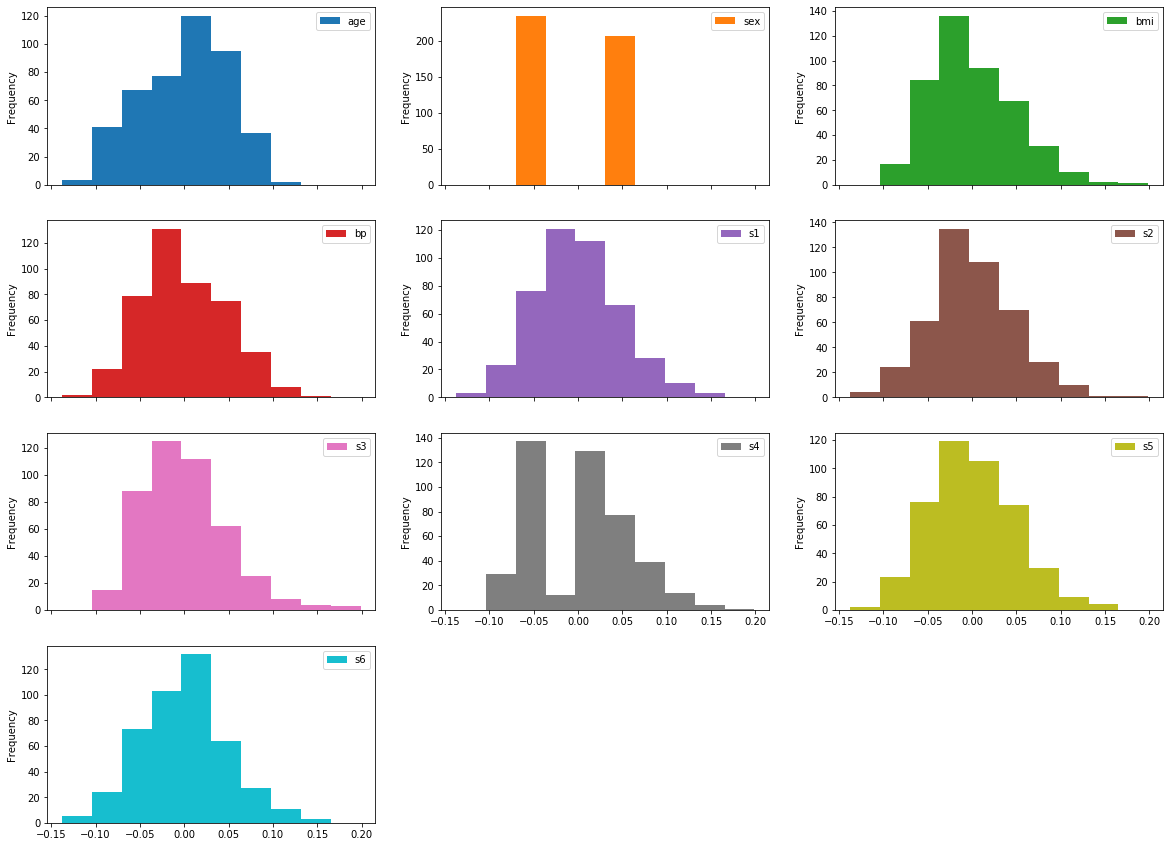

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
# Plot input data
df.plot(kind='hist', subplots=True, layout=(4,3))
plt.show()

## Applicare la regressione lineare al dataset diabetes
Usiamo fit_intercet=False. L'implementazione con fit_intercept = True la trovate negli Extra

 X Train shape:  (422, 11)
Y Train shape:  (422,)
(20,)
(20,)


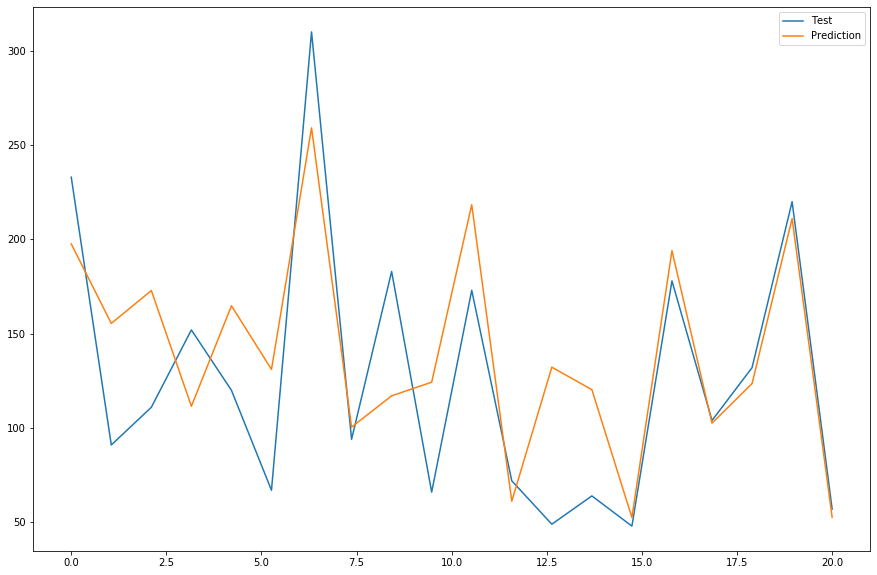

In [ ]:
# Creiamo il regressore lineare
# Esempio interessante: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Implementazione Intercept FALSE , see Extra Advance for Intercept True
plt.rcParams['figure.figsize'] = [15, 10]
class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=False, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      return self.reg.coef_
    def predict(self,X_test,coef_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T) 
      return Y_pred

# Creiamoil dataset
data = dataset_scelto['data'] 
target = dataset_scelto['target']
x_train = data[:-20]

X_train = np.vstack([np.ones(len(x_train)), x_train.T]).T
Y_train = target[:-20]
x_test = data[-20:]
X_test = np.vstack([np.ones(len(x_test)), x_test.T]).T
Y_test = target[-20:]

print(" X Train shape: ",X_train.shape)
print("Y Train shape: ", Y_train.shape)

# Creiamo Regressore Lineare
myLinearRegressor = LinearRegressor()
coef_ = myLinearRegressor.train(X_train,Y_train)
# Cosa vogliamo predirre
Y_pred = myLinearRegressor.predict(X_test, coef_)

# Plot
print(Y_test.shape)
print(Y_pred.shape)
length = Y_pred.shape[0] # 20
index_bar = np.linspace(0,length,length)
plt.plot(index_bar, Y_test, label='Test')
plt.plot(index_bar, Y_pred, label='Prediction')
plt.legend()


# Extra Informazioni (Avanzate)

## Scikit-Learn  Regressione Lineare fit_intercept=True senza classi

In [ ]:
#---------------------------------------------------------------------
#--------------------   SCIKIT-LEARN REGRESSORE LINEARE  -------------
#---------------------------------------------------------------------
#--------------- Implementazione usando fit_intercept=True
# Implementazione piú semplice da scrivere ma meno vicina alla logica matematica

from sklearn import linear_model
import numpy as np

# Linear Model Regression Description https://scikit-learn.org/stable/modules/linear_model.html
# Scikit Documentazione https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Appraoch Linear model: Y=b+aX 
# fit_intercept = True significa che il parametro b è automaticamente settato a 1 e la sua stima sarà inserita in intercept_
reg = linear_model.LinearRegression(fit_intercept=True, normalize=False)

# Y e X
x = np.array([19,21,22,23,26,33,29])
#X = np.vstack([np.ones(len(x)),x]).T
X = np.array([[19],[21], [22], [23], [26], [33],[29]])
Y = np.array([1100,1150,1155,1170,1200,1750,1640])
#print(X)
#print(Y)

reg.fit(X, Y)

# Get w0 and w1
w0 = reg.intercept_
w1 = reg.coef_

print('w0: ', reg.coef_)
print('w1: ', reg.intercept_)

X_test = np.array([[25]]) # giada ha 25 anni
Y_pred = reg.predict(X_test)
Y_pred_ = w0 + w1*X_test 
print('Giada gudagnerà al mese: ', Y_pred, Y_pred_)

w0:  [50.70235756]
w1:  56.21316306483277
Giada gudagnerà al mese:  [1323.77210216] [[1323.77210216]]


## Scikit-Learn  Regressione Lineare fit_intercept=True con classi

In [ ]:
#---------------------------------------------------------------------
#---------------- CLASSE SCIKIT-LEARN REGRESSORE LINEARE -------------
#---------------------------------------------------------------------
#--------------- Implementazione usando fit_intercept=True
# Implementazione piú semplice da scrivere ma meno vicina alla logica matematica

from sklearn import linear_model
import numpy as np

class Dataset:
    def create(self):
      X= np.array([[19],[21], [22], [23], [26], [33],[29]])
      Y= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
      return X,Y

class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      print(self.reg.intercept_) # Questo deve essere diverso da 0 se fit_intercept=True
      return self.reg.coef_, self.reg.intercept_
    def predict(self,X_test,coef_, intercept_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T) + intercept_
      return Y_pred

myDataset=Dataset()
X,Y = myDataset.create()
myLinearRegressor = LinearRegressor()
# coef_ rappresenta w1,w2, ... wN , intercept_ rappresenta w0
coef_, intercept_ = myLinearRegressor.train(X,Y)
print(coef_, intercept_)
# Set input Giada 25 anni Y=w0*1 + w1*X1 --> 1 X1=25 
X_test = np.array([[25]])  
Y_pred = myLinearRegressor.predict(X_test,coef_, intercept_)
print(Y_pred)



[56.21316306]
[[50.70235756]] [56.21316306]
[[1323.77210216]]


## Regressione Lineare implementata usando numpy (calcolo matriciale)

In [ ]:
# Implementazione regressore lineare usando solo numpy
#---------------------------------------------------------------------
#---------------- IMPLEMENTAZIONE REGRESSORE LINEARE NUMPY -----------
#---------------------------------------------------------------------
# Link Utile Least square with numpy: https://mmas.github.io/least-squares-fitting-numpy-scipy

'''
[Y1]       [1 X1]
[Y2]       [1 X2]   [w0]
[Y3]   =   [1 X3]   [w1] 
...        ......
[YN]       [1 XN]

Y = Xbeta
Nx1 = Nx2 x 2x 1
beta = ( (XT*X)∧-1 )*XT*Y  (Least square)
'''
import numpy as np

# Construct Input Matrices
x = np.array([19,21,22,23,26,33,29])
X = np.vstack([np.ones(len(x)), x]).T
Y = np.vstack(np.array([1100,1150,1155,1170,1200,1750,1640]))
#print(X)
#print(Y)

# Solve Least square Matematicall (Matrix product)
# beta = ( (XT*X)∧-1 )*XT*Y  (Least square)
coeff = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
print("Coefficienti: ", coeff.T)
w0 = coeff[0]
w1  = coeff[1]

# Different approach Using Numpy Functions
#coeff_2 = np.linalg.lstsq(X, Y)[0]
#print("Coefficient caso 2: ", coeff_2)
#a  = coeff_2[0]
#b = coeff_2[1]

X_test = 25
Y_pred = w0 + w1*X_test 
print('Giada (25 anni) gudagnerà al mese: ', Y_pred)

Coefficienti:  [[56.21316306 50.70235756]]
Giada (25 anni) gudagnerà al mese:  [1323.77210216]


## Come trasformare python dizionari in  python array e viceversa

In [ ]:
#---------------------------------------------------------------------
#---------------- Trasformare dizionari in Array --------- -----------
#---------------------------------------------------------------------
# Usiamo Le funzioni
# Importare i datasets

from sklearn import datasets

iris = datasets.load_iris() # Load iris dataset
digits = datasets.load_digits() # Load digits dataset
boston = datasets.load_boston() # Load boston dataset
diabetes = datasets.load_diabetes() # Load diabetes dataset
linnerud = datasets.load_linnerud() # Load linnerud dataset
wine = datasets.load_wine() # Load wine dataset
breast_cancer = datasets.load_breast_cancer() # Load breast_cancer dataset

dataset_scelto = iris

def approccio_1(dataset_scelto):
  # --------------------- Approccio 1
  # Get dictionar keys, value
  print(dataset_scelto.keys())
  list_keys = []
  list_values = []
  for key in dataset_scelto:
    list_keys.append(key)
    print(key)
    value = dataset_scelto[key]
    list_values.append(value)
  print("All keys inside array ", list_keys) 
  #print("All values inside array ", list_values) 

  # Convert list to numpy array
  print("----------------------------------")
  array_keys = np.asarray(list_keys)
  array_values = np.array(list_values)
  print(type(array_keys), array_keys.shape, array_keys[0].shape)
  print(type(array_values), array_values.shape,array_values[0].shape)

  # Going deeper inside data shape
  print("----------------------------------")
  for i in range(0,len(array_keys)):
    if isinstance(array_values[i],np.ndarray):
      print(array_keys[i], type(array_values[i]), array_values[i].shape )
    else:
      print(array_keys[i], type(array_values[i]))
    
  # Other Useful Solutions
  '''
  for value in diabetes.values():
    print(value) 

  for key, value in diabetes.items():
    print(key, value)
  '''

def approccio_2(dataset_scelto):
  #--------------------- Approccio 2
  # Convert a dictionary to an array of string
  list_keys = list(dataset_scelto.keys())
  list_values = list(dataset_scelto.values())
  #print(list_keys)
  print(type(list_keys))
  #print(list_values)
  print(type(list_values))
  # Convert list as numpy narray
  array_keys = np.asarray(list_keys)
  array_values = np.array(list_values)
  print(type(array_keys))
  print(type(array_values))
  # Covert back numpy ndarray to list
  new_list_keys = array_keys.tolist()
  new_list_values = array_values.tolist()
  print(type(new_list_keys))
  print(type(new_list_values))
  # Check if the list are equal
  if list_keys == new_list_keys and list_values==new_list_values: 
    print ("The lists are identical") 
  else : 
    print ("The lists are not identical")

print("-----------------------------")
print("-------- Approach 1 ---------")
print("-----------------------------")
approccio_1(dataset_scelto)
print("-----------------------------")
print("-------- Approach 2 ---------")
print("-----------------------------")
approccio_2(dataset_scelto)


-----------------------------
-------- Approach 1 ---------
-----------------------------
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
data
target
target_names
DESCR
feature_names
filename
All keys inside array  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
----------------------------------
<class 'numpy.ndarray'> (6,) ()
<class 'numpy.ndarray'> (6,) (150, 4)
----------------------------------
data <class 'numpy.ndarray'> (150, 4)
target <class 'numpy.ndarray'> (150,)
target_names <class 'numpy.ndarray'> (3,)
DESCR <class 'str'>
feature_names <class 'list'>
filename <class 'str'>
-----------------------------
-------- Approach 2 ---------
-----------------------------
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>
The lists are identical


## Scikit-Learn Regressione Lineare applicata al dataset Diabetes

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
 X Train shape:  (422, 10)
Y Train shape:  (422,)
(20,)
(20,)


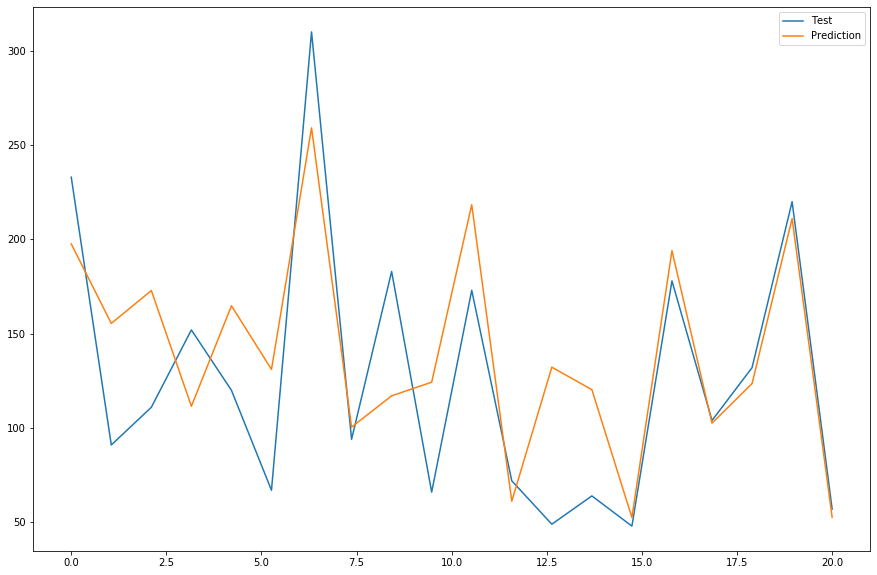

In [ ]:
#-----------------------------------------------------------------------------------------------
#----------------SCIKIT-LEARN REGRESSORE LINEARE APPLICATA A UN DATASET (DIABETES) -------------
#-----------------------------------------------------------------------------------------------
#--------------- Implementazione usando fit_intercept=True
# Implementazione piú semplice da scrivere ma meno vicina alla logica matematica

# Importare i datasets
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

iris = datasets.load_iris() # Load iris dataset
digits = datasets.load_digits() # Load digits dataset
boston = datasets.load_boston() # Load boston dataset
diabetes = datasets.load_diabetes() # Load diabetes dataset
linnerud = datasets.load_linnerud() # Load linnerud dataset
wine = datasets.load_wine() # Load wine dataset
breast_cancer = datasets.load_breast_cancer() # Load breast_cancer dataset

dataset_scelto = diabetes

# Check the dataset diabetes
#print(dataset_scelto)
parametri = dataset_scelto.keys()
valore = dataset_scelto.values()
print(parametri)


# Creiamo il regressore lineare
# Esempio interessante: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
class LinearRegressor:
    def __init__(self):
      # Inizializzazione
      self.reg = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    def train(self,X,Y):
      # Estimate w0, w1 .. wN
      self.reg.fit(X,Y)
      return self.reg.coef_, self.reg.intercept_
    def predict(self,X_test,coef_, intercept_):
      Y_pred = self.reg.predict(X_test)
      #Y_pred = np.dot(coef_, X_test.T) + intercept_
      return Y_pred

# Creiamoil dataset
data = dataset_scelto['data'] 
target = dataset_scelto['target']
X_train = data[:-20]
Y_train = target[:-20]
X_test = data[-20:]
Y_test = target[-20:]

print(" X Train shape: ",X_train.shape)
print("Y Train shape: ", Y_train.shape)

# Creiamo Regressore Lineare
myLinearRegressor = LinearRegressor()
coef_, intercept_ = myLinearRegressor.train(X_train,Y_train)
# Cosa vogliamo predirre
Y_pred = myLinearRegressor.predict(X_test, coef_, intercept_)

# Plot
print(Y_test.shape)
print(Y_pred.shape)
length = Y_pred.shape[0] # 20
index_bar = np.linspace(0,length,length)
plt.plot(index_bar, Y_test, label='Test')
plt.plot(index_bar, Y_pred, label='Prediction')
plt.legend()

## Esercizio Classi + Plotly

In [ ]:
import numpy as np
from sklearn import linear_model
import plotly.graph_objects as go

class myAlgorithm:
    def __init__(self,param=1): #
        # Funzione che viene chiamata nel momento in cui creo la classe
        # Creo i dati
        #self.XX= np.array([[1,19,150,6],[1,21,135,8], [1,22,160,5], [1,23,158,7], [1,26,155,7], [1,33,120,10],[1,29,130,9]])
        self.XX= np.array([[19,150,6],[21,135,8], [22,160,5], [23,158,7], [26,155,7], [33,120,10],[29,130,9]])
        self.YY= np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
        # Creo il modello
        # self.regg = linear_model.LinearRegression(fit_intercept=True, normalize=False)
        # self.regg = linear_model.TheilSenRegressor()
        if param==1:
            self.regg = linear_model.HuberRegressor()
        else:
            self.regg = linear_model.TheilSenRegressor()
        print("Init Function")

    def train(self):
        self.regg.fit(self.XX, self.YY)
        print("Training")

    def predict(self,X):
        Y_hat = self.regg.predict(X)
        print("Prediction")
        return Y_hat
    
    def plot_train_results(self):
        YY_hat = self.regg.predict(self.XX)
        fig = go.Figure()
        ynum = self.YY.shape[0]
        x = np.linspace(0,ynum,ynum,dtype=int)
        fig.add_trace(go.Scatter(x=x, y=self.YY.reshape(-1),mode='lines+markers', name="Y"))
        fig.add_trace(go.Scatter(x=x, y=YY_hat.reshape(-1),mode='lines+markers', name="Y_hat"))
        return fig

ma = myAlgorithm(param=1)
ma.train()
fig = ma.plot_train_results()
fig.show()

# Giada
X = np.array([[27, 230, 6]])
print(ma.predict(X))

Init Function
Training


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Prediction
[773.76385675]


## Come generare pdf da google-colab

In [ ]:
# Install the necessary packages into the virtual machine with:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-drivers cuda-license-10-2 cuda-npp-10-1
  cuda-npp-dev-10-1 cuda-nsight-10-1 cuda-nsight-compute-10-1
  cuda-nsight-systems-10-1 cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1
  cuda-nvjpeg-10-1 cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1
  cuda-nvvp-10-1 default-jre dkms freeglut3 freeglut3-dev
  keyboard-configuration libargon2-0 libcap2 libcryptsetup12 libcublas10
  libdevmapper1.02.1 libfontenc1 libgtk2.0-0 libgtk2.0-common libip4tc0
  libjansson4 libnvidia-cfg1-440 libnvidia-common-430 libnvidia-common-440
  libnvidia-decode-440 libnvidia-enc

In [ ]:
# Mount your google drive to get access to your ipynb files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to PDF "drive/My Drive/Colab Notebooks/RegressioneLineare.ipynb"

[NbConvertApp] Converting notebook drive/My Drive/Colab Notebooks/RegressioneLineare.ipynb to PDF
[NbConvertApp] Support files will be in RegressioneLineare_files/
[NbConvertApp] Making directory ./RegressioneLineare_files
[NbConvertApp] Making directory ./RegressioneLineare_files
[NbConvertApp] Making directory ./RegressioneLineare_files
[NbConvertApp] Making directory ./RegressioneLineare_files
[NbConvertApp] Making directory ./RegressioneLineare_files
[NbConvertApp] Writing 145272 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 290217 bytes to drive/My Drive/Colab Notebooks/RegressioneLineare.pdf
